In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [3]:
df = pd.read_csv('winequality_red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Feature Selection:

In [130]:
x = df.drop(['quality'],axis=1)
y = df['quality']

In [131]:
feat = SelectKBest(score_func=chi2, k='all')
feat.fit(x, y)
Scores = pd.DataFrame(feat.scores_)
Columns = pd.DataFrame(x.columns)
features = pd.concat([Scores, Columns], axis=1)
features

,0,0
0,11.260652,fixed acidity
1,15.580289,volatile acidity
2,13.025665,citric acid
3,4.123295,residual sugar
4,0.752426,chlorides
5,161.936036,free sulfur dioxide
6,2755.557984,total sulfur dioxide
7,0.000230,density
8,0.154655,pH
9,4.558488,sulphates


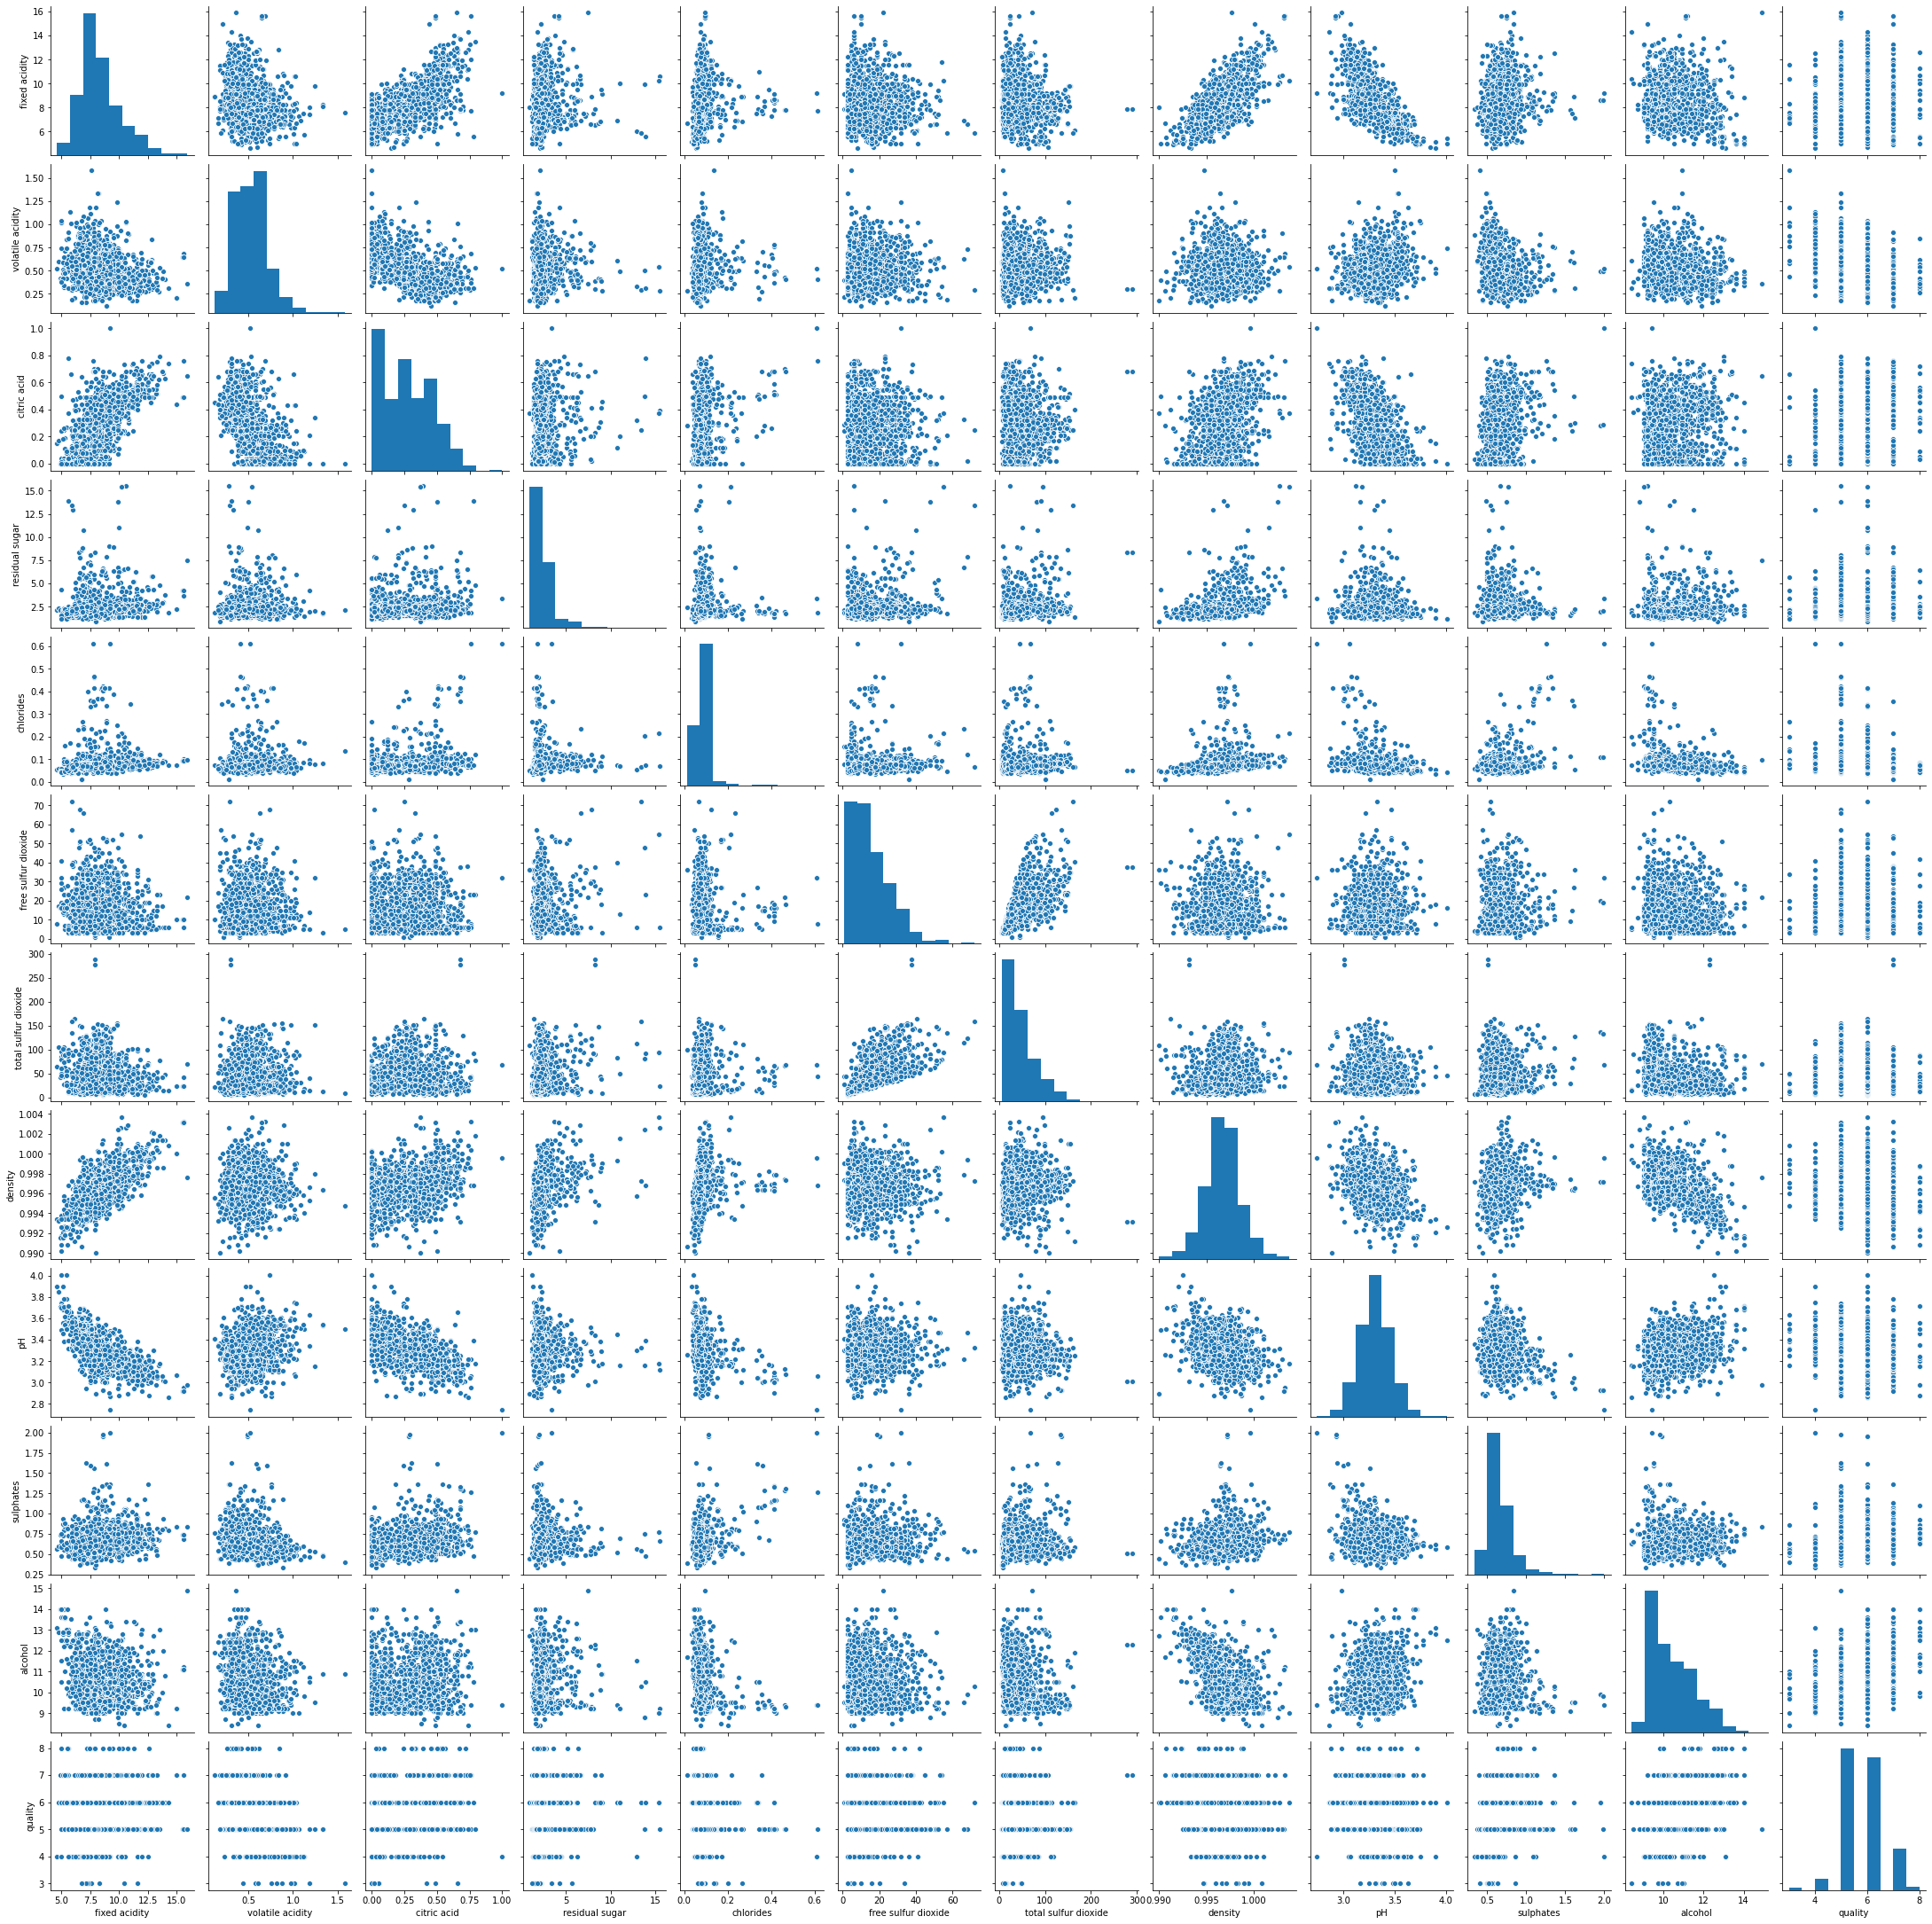

In [9]:
sns.pairplot(df)

In [132]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=65)

Creating a simple model:

In [138]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [139]:
dt.score(x_test, y_test)

0.6175

Evaluating the model:

In [140]:
y_pred = dt.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',acc)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: ',f1)

conf = confusion_matrix(y_test, y_pred)
print(conf)

Accuracy Score:  0.6175
F1 Score:  0.6232740034124399
[[  0   1   1   0   0   0]
 [  0   2   4   2   1   0]
 [  0  12 120  37   9   0]
 [  0   4  35  95  18   1]
 [  0   0   4  18  30   2]
 [  0   0   0   2   2   0]]


In [125]:
grid_params = {'criterion':['gini','entropy'], 
              'max_depth': range(2,32,1), 'min_samples_leaf': range(1,10,1),
              'min_samples_split': range(2,10,1), 'splitter': ['best','random']}

In [126]:
grid_search = GridSearchCV(estimator=dt, param_grid=grid_params, n_jobs=-1, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [127]:
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best Score:  0.5815987460815046


In [128]:
rand_search = RandomizedSearchCV(estimator=dt, param_distributions=grid_params, cv=5, n_jobs=-1, random_state=42)
rand_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 32),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [129]:
print('Best Parameters: ',rand_search.best_params_)
print('Best Score: ',rand_search.best_score_)

Best Parameters:  {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'gini'}
Best Score:  0.5466026645768024
